In [1]:
%matplotlib notebook

In [2]:
import simple_network_utils
from simple_network_utils import *
from optimize_cells.cell_utils import get_R_inp
from dentate.biophysics_utils import QuickSim

In [3]:
simple_network_utils.izhi_cell_type_param_dict = {
    'custom': izhi_cell_type_params(C=1., k=0.7, vr=-65., vt=-50., vpeak=35., a=0.03, b=-2., c=-55., d=100.,
                                celltype=1),
    'RS': izhi_cell_type_params(C=1., k=0.7, vr=-65., vt=-50., vpeak=35., a=0.03, b=-2., c=-55., d=100.,
                                celltype=1),
    'IB': izhi_cell_type_params(C=1.5, k=1.2, vr=-75., vt=-45., vpeak=50., a=0.01, b=5., c=-56., d=130.,
                                celltype=2),
    'CH': izhi_cell_type_params(C=0.5, k=1.5, vr=-60., vt=-40., vpeak=25., a=0.03, b=1., c=-40., d=150.,
                                celltype=3),
    'LTS': izhi_cell_type_params(C=1.0, k=1.0, vr=-56., vt=-42., vpeak=40., a=0.03, b=8., c=-53., d=20.,
                                 celltype=4),
    'FS': izhi_cell_type_params(C=0.2, k=1., vr=-55., vt=-40., vpeak=25., a=0.2, b=-2., c=-45., d=-55.,
                                celltype=5),
    'TC': izhi_cell_type_params(C=2.0, k=1.6, vr=-60., vt=-50., vpeak=35., a=0.01, b=15., c=-60., d=10.,
                                celltype=6),
    'RTN': izhi_cell_type_params(C=0.4, k=0.25, vr=-65., vt=-45., vpeak=0., a=0.015, b=10., c=-55., d=50.,
                                 celltype=7)
}
simple_network_utils.izhi_cell_types = list(simple_network_utils.izhi_cell_type_param_dict.keys())

In [9]:
cell_type = 'custom'
equilibrate = 10.
step_duration = 200.
Rinp_amp = -0.1
step_amp_list = [Rinp_amp] + [0.1 * n for n in range(1, 8)]

In [10]:
simple_network_utils.izhi_cell_types

['custom', 'RS', 'IB', 'CH', 'LTS', 'FS', 'TC', 'RTN']

In [11]:
new_cell = IzhiCell(cell_type=cell_type, gid=0)
sim = QuickSim(cvode=False)
sim.tstop = equilibrate + step_duration

QuickSim: no density mechanisms are using the calcium ion.


In [12]:
sim.append_stim(cell=new_cell, node=new_cell, name='new_step', amp=0., delay=equilibrate, dur=step_duration)

sim.append_rec(cell=new_cell, node=new_cell, name=new_cell.name, loc=0.5, param='_ref_v')
sim.append_rec(cell=new_cell, node=new_cell, name='new_cell_i', object=new_cell.izh, loc=0.5, param='_ref_i')
sim.append_rec(name='new_cell_u', cell=new_cell, node=new_cell, object=new_cell.izh, param='_ref_u')

<IPython.core.display.Javascript object>


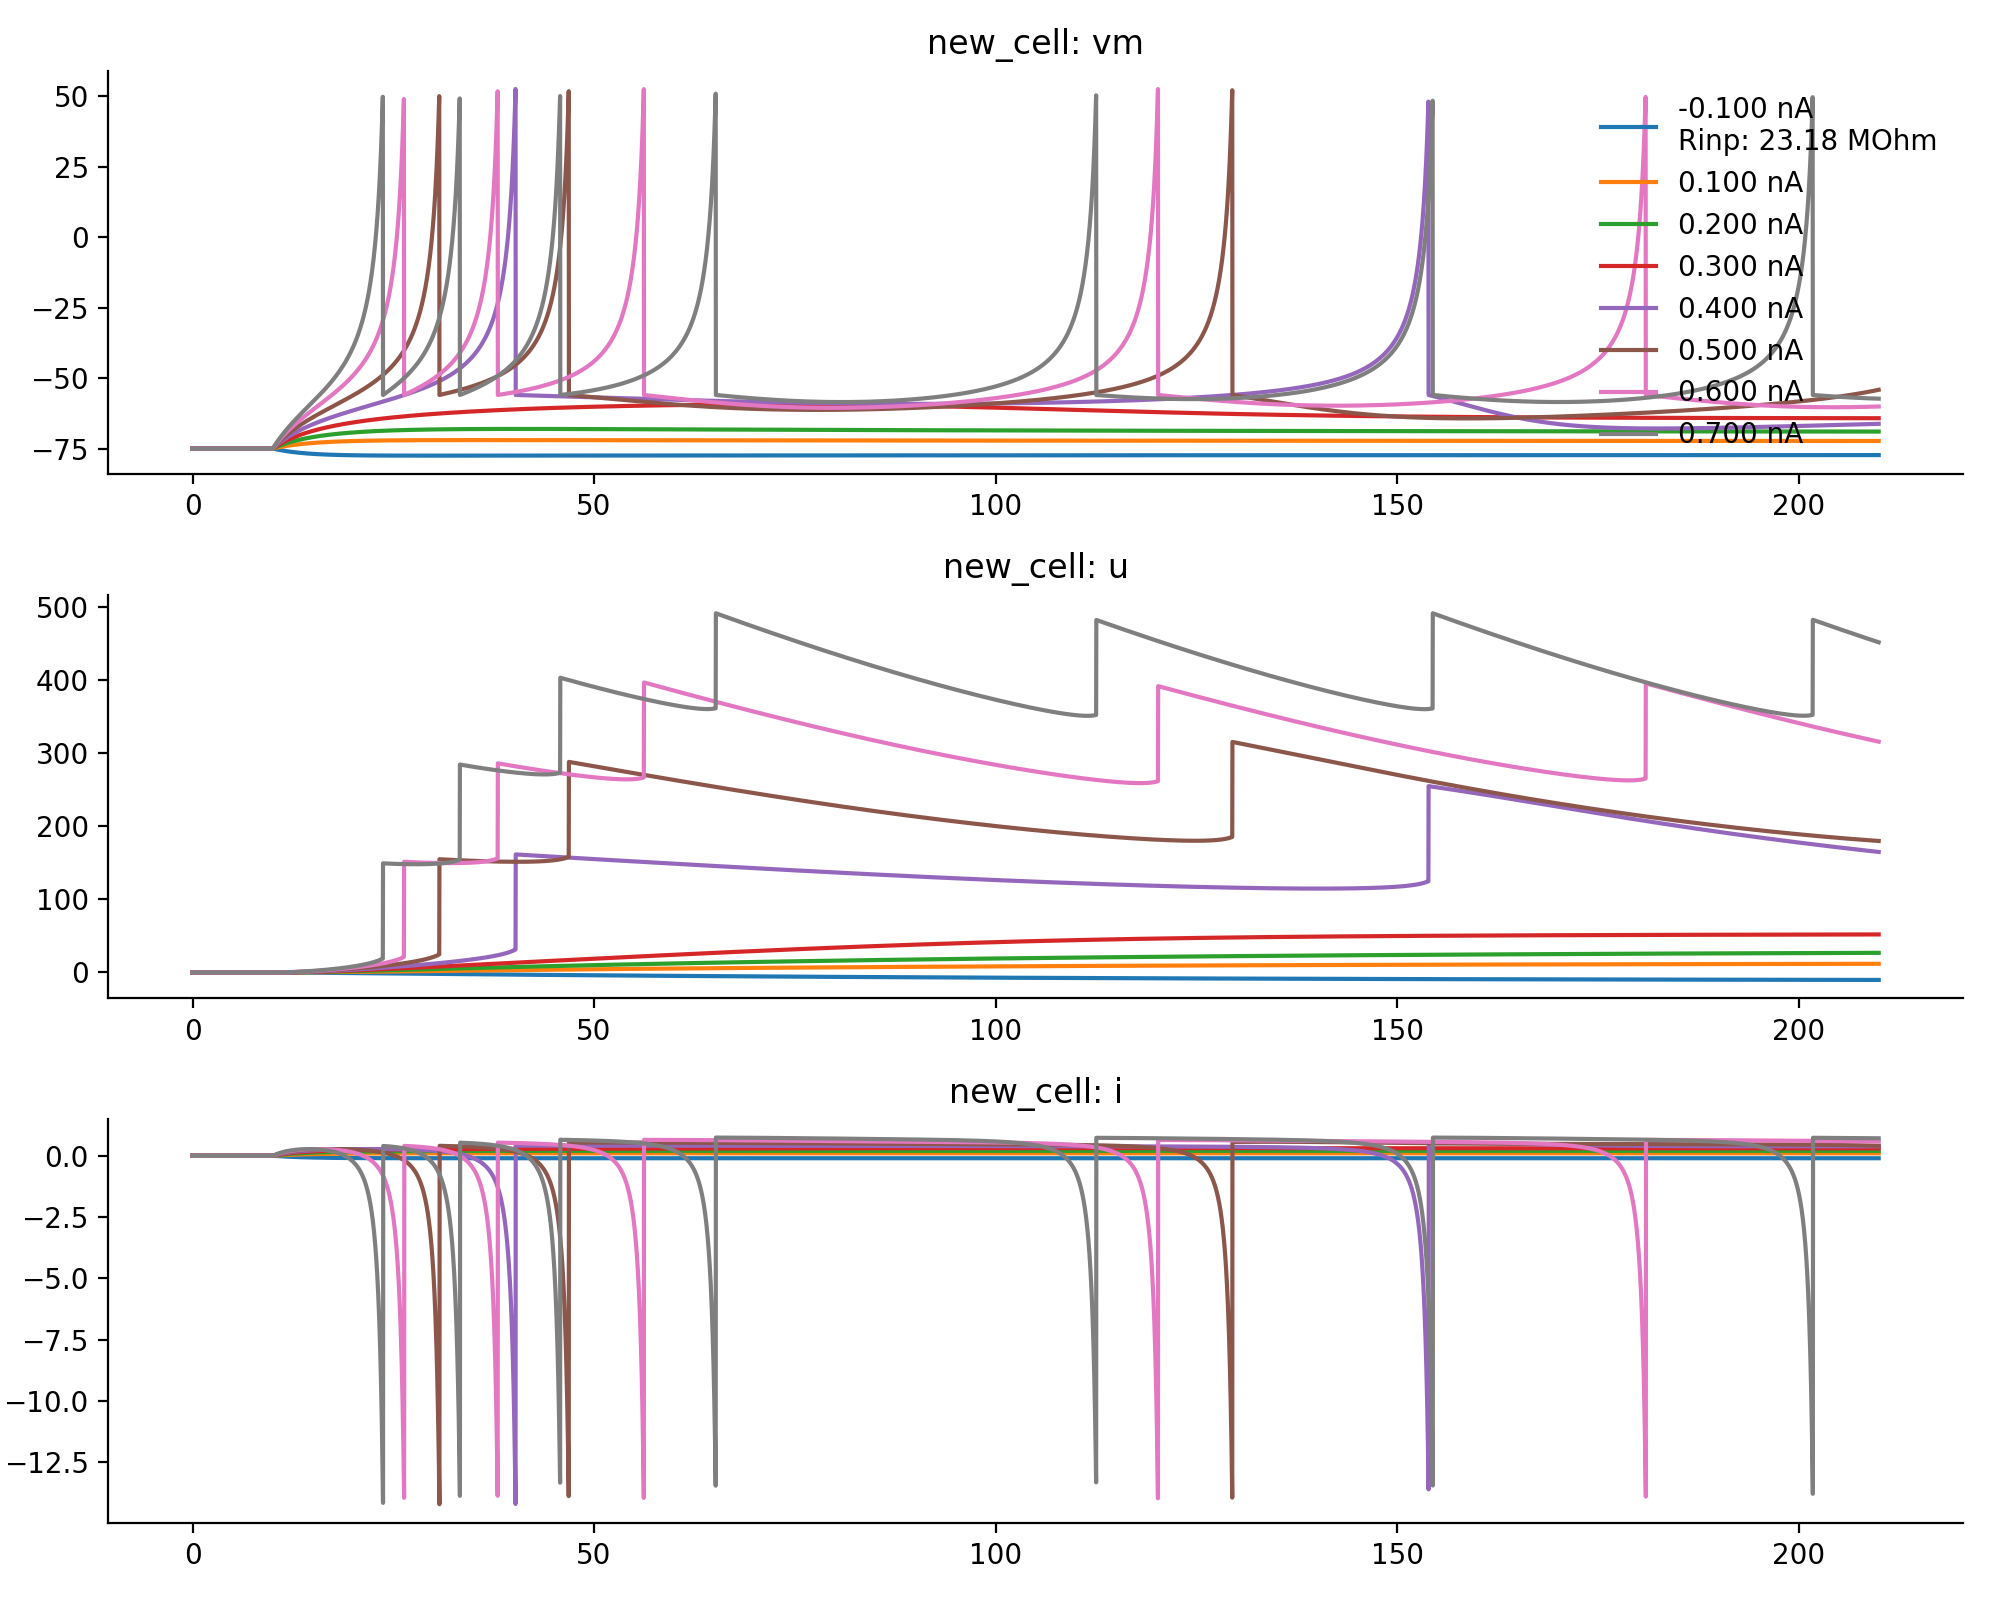

Simulation runtime: 0.04 s
Simulation runtime: 0.03 s
Simulation runtime: 0.04 s
Simulation runtime: 0.04 s
Simulation runtime: 0.03 s
Simulation runtime: 0.03 s
Simulation runtime: 0.04 s
Simulation runtime: 0.04 s


In [13]:
fig, axes = plt.subplots(3, figsize=(10,8))
for step_amp in step_amp_list:
    sim.modify_stim(name='new_step', amp=step_amp)
    sim.run()
    new_vm_label = '%.3f nA' % step_amp
    if step_amp == Rinp_amp:
        new_Rinp = get_R_inp(amp=step_amp, dt=sim.dt, start=equilibrate, stop=sim.tstop, t=np.array(sim.tvec),
                 vm=np.array(sim.recs[new_cell.name]['vec']))[2]
        new_vm_label = new_vm_label + '\nRinp: %.2f MOhm' % new_Rinp
    
    axes[0].plot(np.array(sim.tvec), np.array(sim.recs[new_cell.name]['vec']), label=new_vm_label)
    axes[0].set_title('new_cell: vm')
    axes[1].plot(np.array(sim.tvec), np.array(sim.recs['new_cell_u']['vec']))
    axes[1].set_title('new_cell: u')
    axes[2].plot(np.array(sim.tvec), np.array(sim.recs['new_cell_i']['vec']))
    axes[2].set_title('new_cell: i')
axes[0].legend(loc='best', frameon=False, framealpha=0.5)
clean_axes(axes)
fig.tight_layout()
fig.subplots_adjust(hspace=0.3, wspace=0.15)
fig.show()